In [1]:
import numpy as np
import pandas as pd
import scipy.stats 
import matplotlib.pyplot as plt 

In [35]:
data = pd.read_csv('https://raw.githubusercontent.com/artamonoff/econometrica/refs/heads/main/econometrica-1/datasets/wage2.csv') # датасет - https://www.kaggle.com/rio2016/olympic-games
data.head()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [4]:
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [36]:

data[ pd.isnull(data['educ'])].head()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage


In [38]:
data['educ'].unique() 

array([12, 18, 14, 11, 16, 10, 15, 13, 17,  9], dtype=int64)

In [39]:
data = data.fillna(-1)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    int64  
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   KWW      935 non-null    int64  
 4   educ     935 non-null    int64  
 5   exper    935 non-null    int64  
 6   tenure   935 non-null    int64  
 7   age      935 non-null    int64  
 8   married  935 non-null    int64  
 9   black    935 non-null    int64  
 10  south    935 non-null    int64  
 11  urban    935 non-null    int64  
 12  sibs     935 non-null    int64  
 13  brthord  935 non-null    float64
 14  meduc    935 non-null    float64
 15  feduc    935 non-null    float64
 16  lwage    935 non-null    float64
dtypes: float64(4), int64(13)
memory usage: 124.3 KB


In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:

data

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,-1.0,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,1,0,0,1.0,11.0,-1.0,6.253829
931,1202,40,102,32,13,10,3,31,1,0,1,1,7,7.0,8.0,6.0,7.091742
932,538,45,77,22,12,12,10,28,1,1,1,0,9,-1.0,7.0,-1.0,6.287858
933,873,44,109,25,12,12,12,28,1,0,1,0,1,1.0,-1.0,11.0,6.771935


In [45]:
X = data [['educ', 'age','black']]
X = pd.get_dummies (X, drop_first=True)
print()
X.head()

,educ,age,black
0,12,31,0
1,18,37,0
2,14,33,0
3,12,32,0
4,11,34,0


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
le.fit( data['black'])

LabelEncoder()

In [47]:
le.classes_

array([0, 1], dtype=int64)

In [55]:

le.inverse_transform([1, 0, 1])

array([1, 0, 1], dtype=int64)

In [56]:
X

,educ,age,black
0,12,31,0
1,18,37,0
2,14,33,0
3,12,32,0
4,11,34,0
...,...,...,...
930,16,30,1
931,13,31,0
932,12,28,1
933,12,28,0


In [57]:
y = (data['south']>0).astype('int32')
y.head()

0    0
1    0
2    0
3    0
4    0
Name: south, dtype: int32

<Axes: >

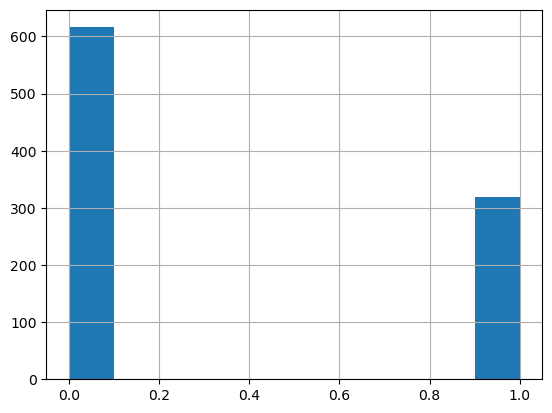

In [58]:
y.hist()

In [59]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, class_weight='balanced'))

In [60]:
model = LogisticRegression()

In [61]:
y

0      0
1      0
2      0
3      0
4      0
      ..
930    1
931    1
932    1
933    1
934    1
Name: south, Length: 935, dtype: int32

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_train

,educ,age,black
408,14,29,0
5,16,35,1
54,12,29,0
275,14,31,1
868,13,38,0
...,...,...,...
106,17,34,0
270,16,28,0
860,12,29,0
435,12,30,0


In [64]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [65]:
predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [66]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [67]:

model.predict_proba(X_test)

array([[0.66994818, 0.33005182],
       [0.73414935, 0.26585065],
       [0.67626237, 0.32373763],
       [0.67715925, 0.32284075],
       [0.66994818, 0.33005182],
       [0.66904106, 0.33095894],
       [0.67805482, 0.32194518],
       [0.63933644, 0.36066356],
       [0.33433309, 0.66566691],
       [0.73733756, 0.26266244],
       [0.75254043, 0.24745957],
       [0.67175863, 0.32824137],
       [0.67626237, 0.32373763],
       [0.33616032, 0.66383968],
       [0.73494871, 0.26505129],
       [0.74715774, 0.25284226],
       [0.65201751, 0.34798249],
       [0.72564589, 0.27435411],
       [0.6873979 , 0.3126021 ],
       [0.67626237, 0.32373763],
       [0.67626237, 0.32373763],
       [0.6557288 , 0.3442712 ],
       [0.67805482, 0.32194518],
       [0.67266194, 0.32733806],
       [0.73654281, 0.26345719],
       [0.67085404, 0.32914596],
       [0.75024302, 0.24975698],
       [0.67266194, 0.32733806],
       [0.72319063, 0.27680937],
       [0.75406414, 0.24593586],
       [0.

In [68]:
model.score(X_train, y_train) 

0.696524064171123

In [69]:
from sklearn.metrics import f1_score

In [70]:
f1_score(y_test, model.predict(X_test))

0.3181818181818182

In [71]:
f1_score(y_train, model.predict(X_train))

0.35327635327635326

In [72]:
model.score(X_test,y_test)

0.679144385026738